In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from skimage.feature import graycomatrix, graycoprops
import pandas as pn

In [39]:
def matrixCo(
    img,
    distance,
    angel,
):
    # Procesamiento de Submuestreo
    imgColumn = img.reshape(-1, 1)
    escala = (0, 20)
    level = max(escala) + 1
    newIm = MinMaxScaler(escala).fit_transform(imgColumn).astype(int)
    ## Redimencion de la nueva Imagen
    newIm = newIm.reshape(img.shape)

    # Desplegar Resultados
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10, 5)
    ax[0].imshow(img, cmap="gray")
    ax[0].set_title("Imagen Original")
    ax[1].imshow(newIm, cmap="gray")
    ax[1].set_title("Imagen Nueva")
    plt.show()

    P = graycomatrix(newIm, distances=distance, angles=angel, levels=level)
    features = [
        "contrast",
        "dissimilarity",
        "homogeneity",
        "ASM",
        "energy",
        "correlation",
    ]
    ##Estraer Descriptores
    descr = [float(graycoprops(P, feat).squeeze()) for feat in features]  # type: ignore
    return P, descr

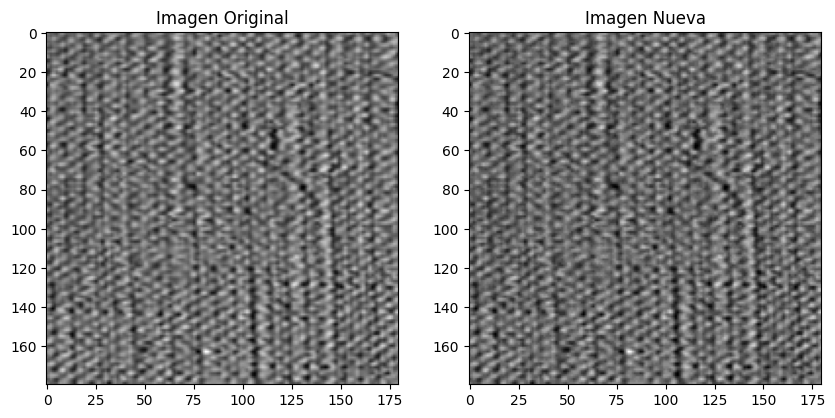

[3.1460273122284295, 1.3887957790192424, 0.4716179797431852, 0.01955675425120823, 0.1398454656083215, 0.7363526207232645]


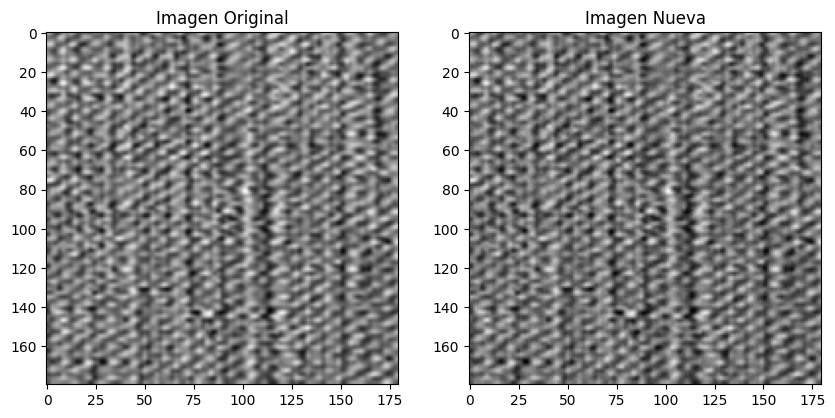

[2.6988826815642457, 1.282371198013656, 0.4954696542898974, 0.017180140722477106, 0.13107303583299315, 0.8330326269458844]


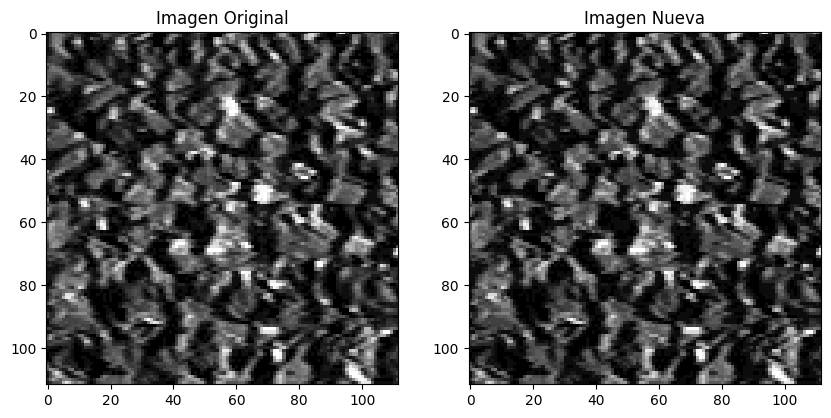

[7.32046332046332, 1.8442728442728442, 0.46921146595075963, 0.025916765841958893, 0.16098684990383189, 0.7804784522148436]


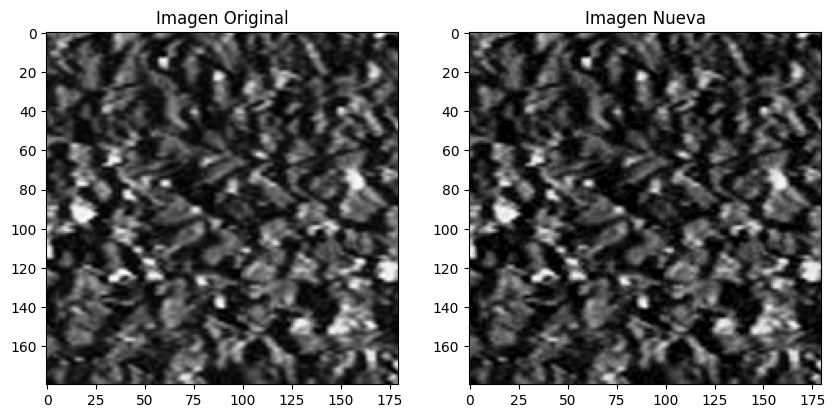

[2.4316883923029176, 1.0888578522656736, 0.5756911314372944, 0.02484304061039078, 0.15761675231519898, 0.9161923949959789]


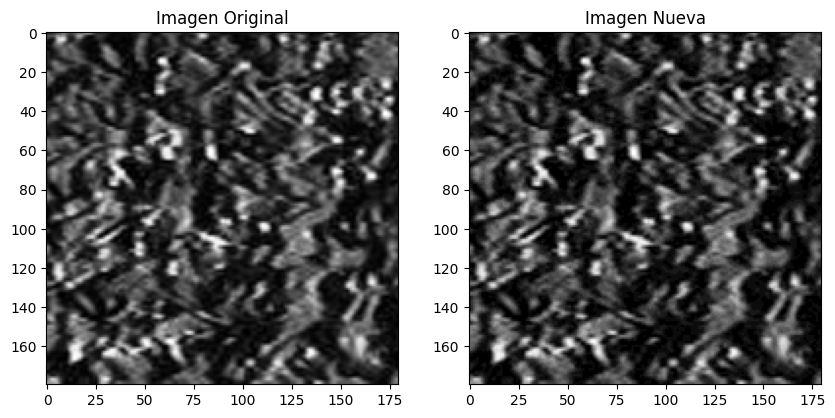

[2.808566108007449, 1.1456238361266293, 0.5719605858723386, 0.027261616193141425, 0.16511092087787962, 0.9079176858518226]


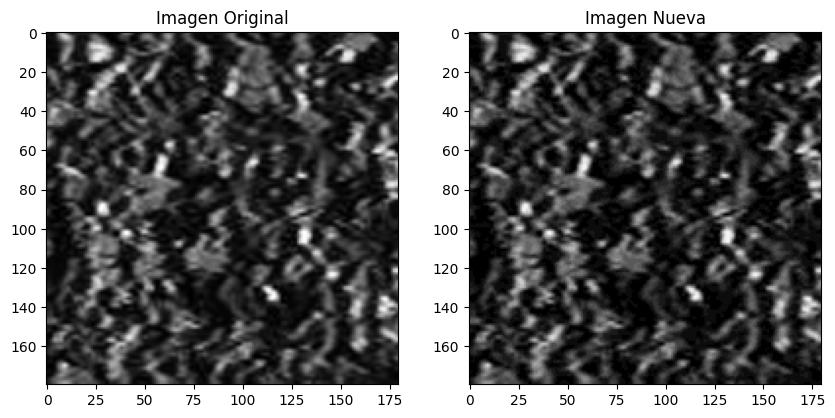

[2.048758535071384, 0.9715394165114835, 0.6117842460119819, 0.03606282613981083, 0.18990214885516918, 0.9184550042288561]


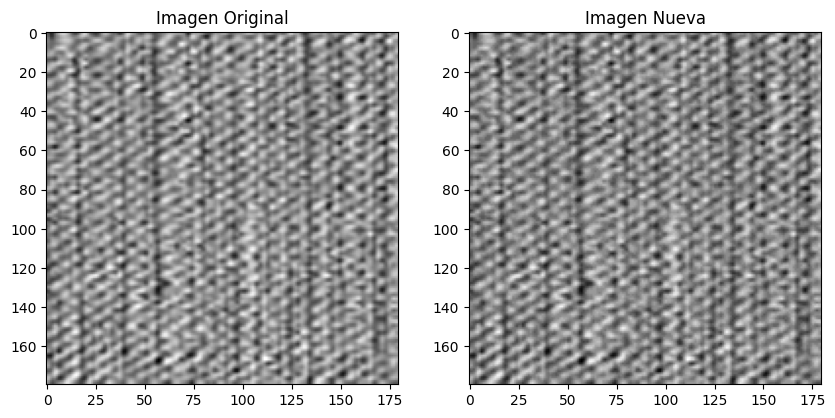

[3.034729981378026, 1.3663873370577282, 0.4757983377092809, 0.01600292410842435, 0.12650266443211522, 0.8171376574261552]


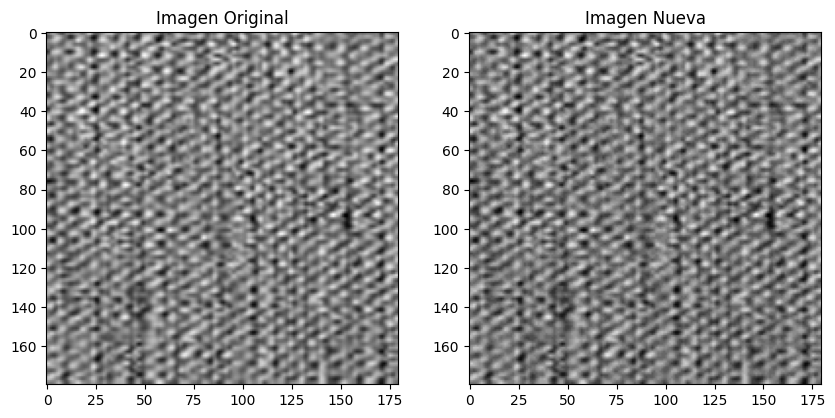

[3.1224705152079455, 1.3796399751707014, 0.47518645119499536, 0.016208174248965736, 0.12731132804650863, 0.8135194557637166]


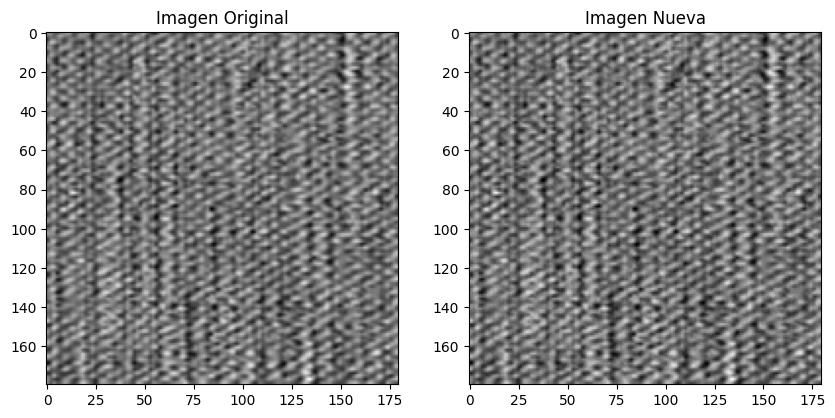

[3.0563314711359406, 1.370173805090006, 0.4755899364821481, 0.017816657361459334, 0.13347905214474418, 0.7786340762643797]


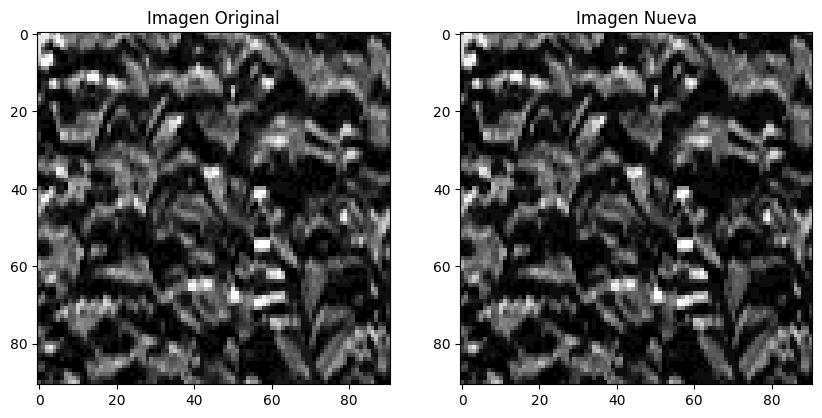

[9.265567765567766, 2.037973137973138, 0.45421485868844447, 0.028914233236577568, 0.17004185730748053, 0.731999827888261]


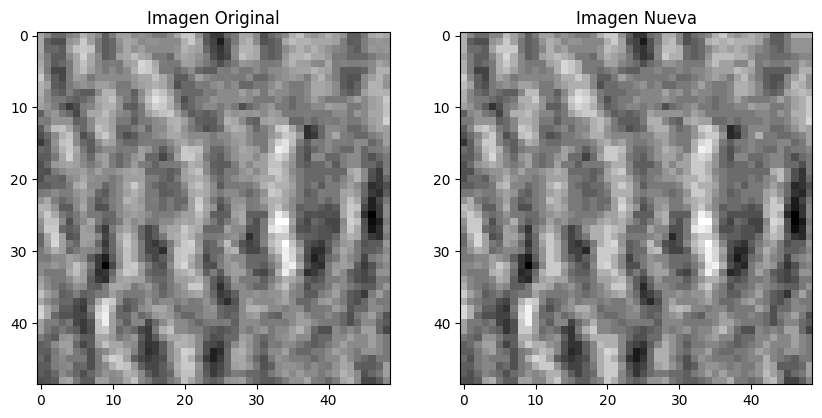

[5.759778911564625, 1.857568027210884, 0.3993496816256994, 0.01683832546624092, 0.12976257344180916, 0.6311339058075466]


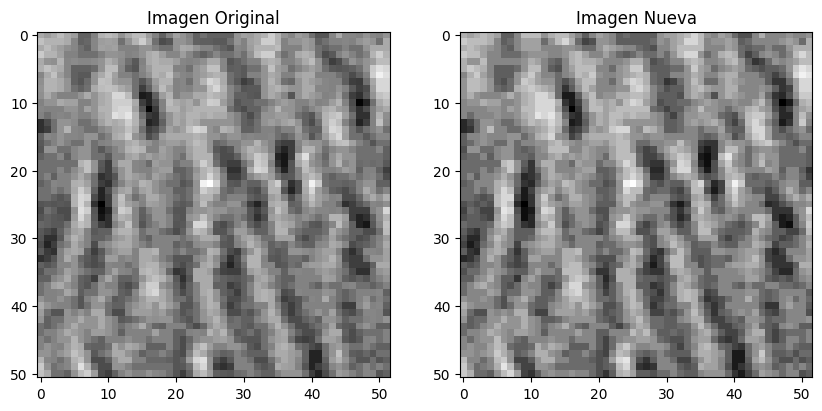

[6.518646674356017, 1.9550173010380627, 0.3951010106934343, 0.018934101144962287, 0.13760123962000592, 0.6462915416597442]


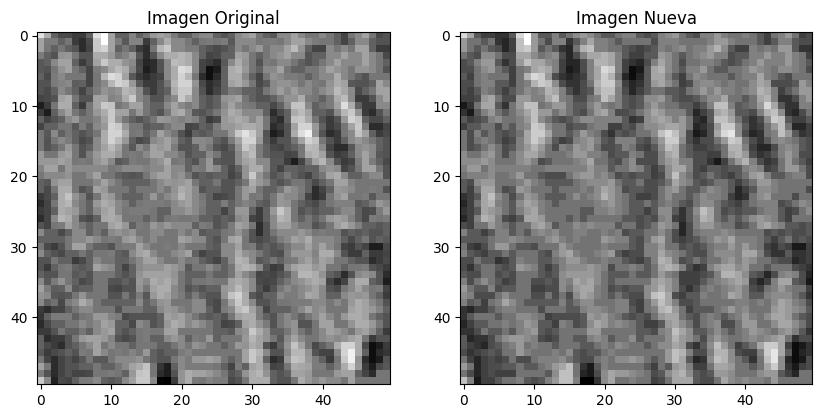

[6.01795918367347, 1.893061224489796, 0.3977185506177935, 0.02222207413577676, 0.1490707018021206, 0.6261772483003125]


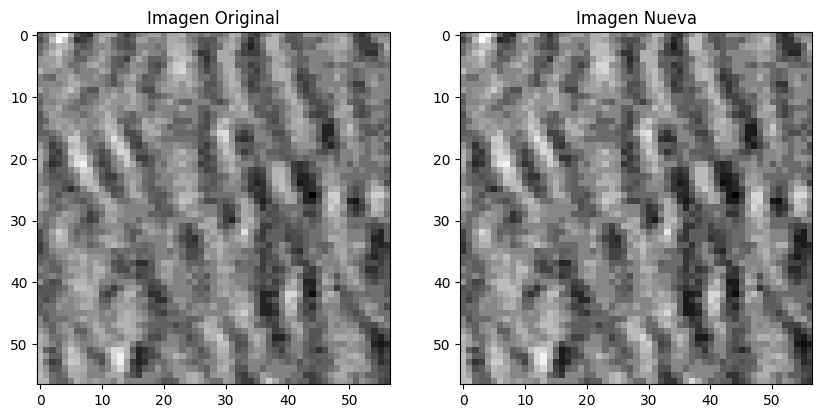

[6.056704260651628, 1.906954887218045, 0.3978190615155427, 0.020223648092662732, 0.14220987340076896, 0.6520846790414874]


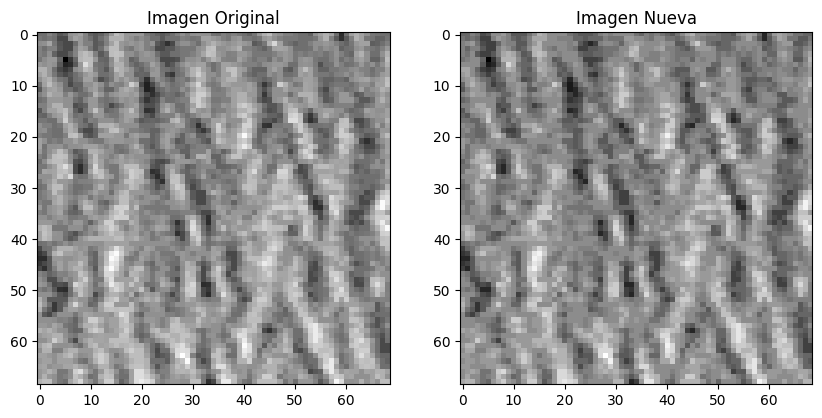

[4.898337595907929, 1.6975703324808185, 0.429810657643588, 0.020999811763543035, 0.14491311798295914, 0.6607636798487471]


In [40]:
#!unzip texturas_fisher.zip Es para solo subir el zip con las imagenes y extraerlas usando la consola
from skimage.io import imread_collection

files = imread_collection("img/texturas_fisher/textura_*.tif")
for file in files:
    img = cv2.cvtColor(file, cv2.COLOR_BGR2GRAY)
    P, descr = matrixCo(img, [1], [0])
    print(descr)